# Face Detection using a Pytorch CNN - Using LFW and AID Datasets

LFW Dataset - https://www.kaggle.com/jessicali9530/lfw-dataset

AID Dataset - https://www.kaggle.com/ashishsaxena2209/animal-image-datasetdog-cat-and-panda

In [1]:
import pandas as pd
import os
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import math
######
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [2]:
class NeetoCNN(nn.Module):

    def __init__(self, inchannels = 3):
        super(NeetoCNN, self).__init__()
        # 3 input image channel then 6 ch then 9 and finnally 12, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(inchannels, inchannels * 2, 5)
        self.conv2 = nn.Conv2d(inchannels * 2, inchannels * 3, 11)
        # an affine operation: y = Wx + b
        # Remember after a conv operation nout = (nin+2*npadding-nfilter)+1
        # in this example
        # conv1 = 250-5+1 = 246 => Maxpool => 82
        # conv2 = 82-11+1 = 72 => maxpool => 18
        self.fc1 = nn.Linear(inchannels * 3* 18 * 18, 256)  # 10*10 from image dimension
        self.fc2 = nn.Linear(256, 4)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x.float())), 3)
        x = F.max_pool2d(F.relu(self.conv2(x)), 4)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
myCNN = NeetoCNN()
print(myCNN)

NeetoCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 9, kernel_size=(11, 11), stride=(1, 1))
  (fc1): Linear(in_features=2916, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=4, bias=True)
)


In [3]:
def str_converter(num, sz):
    num = str(num)
    while len(num) < sz:
        num = "0" + num
    return num

imagenes totales de personas 13240


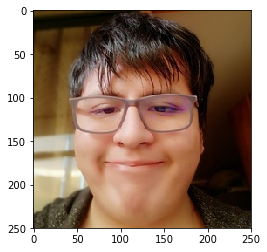

In [4]:
data_folder = "./Data/Data/"
face_folder = "lfw-deepfunneled/lfw-deepfunneled/"
name_ds = pd.read_csv(data_folder + "lfw/lfw_allnames.csv")
name_list = name_ds.values.tolist()
name = "Ricardo_Lazo_fd"
name_list.append([name, 7])
acum = 0
for i in name_list:
    acum += i[1]
print("imagenes totales de personas", acum)
im = Image.open(data_folder + "lfw/" + face_folder + name + "/" + name + "_" + str_converter(1, 4) + ".jpg")
imshow(np.asarray(im))

imagenes por animales: 1000 c/u


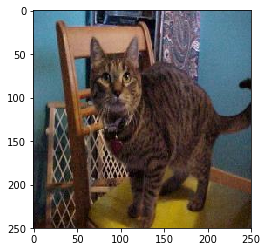

In [5]:
aid_aug_folder = "aid_aug/animals/"
animals = ["cats", "dogs", "panda"]
print("imagenes por animales: 1000 c/u")
im = Image.open(data_folder + aid_aug_folder + animals[0] + "/" + animals[0] + "_" + str_converter(1,5) + ".jpg")
imshow(np.asarray(im))
#im = Image.open(data_folder + aid_aug_folder + animals[1] + "/" + animals[1] + "_" + str_converter(1,5) + ".jpg")
#imshow(np.asarray(im))
#im = Image.open(data_folder + aid_aug_folder + animals[2] + "/" + animals[2] + "_" + str_converter(1,5) + ".jpg")
#imshow(np.asarray(im))

In [6]:
Y_t = np.array([[1.,0.,0.,0.], [0.,1.,0.,0.], [0.,0.,1.,0.], [0.,0.,0.,1.]], dtype=np.float64)

In [7]:
# loss
loss_fn = nn.MSELoss()
# learning rate
learning_rate = 1e-4
# optimizer
optimizer = torch.optim.Adam(myCNN.parameters(), lr=learning_rate)

In [14]:
#print("it: ", end = "")
an = False
for t in range(1000):
    if an == True:
        for i in animals:
            if i == "cats":
                Y_case = np.array([Y_t[1]])
            elif i == "dogs":
                Y_case = np.array([Y_t[2]])
            else:
                Y_case = np.array([Y_t[3]])
            Y_case = torch.from_numpy(Y_case).to(torch.float32)
            for j in range(1, 50):
                im = Image.open(data_folder + aid_aug_folder + i + "/" + i + "_" + str_converter(j, 5) + ".jpg")
                temp_np = np.reshape(np.array(im.convert("RGB")), (1,3,250,250))
                x = Variable(torch.from_numpy(temp_np)).to(torch.float32)
                # Forward pass: compute predicted y by passing x to the model.
                optimizer.zero_grad()
                y_pred = myCNN(x) #4*1
                #print(y_pred)
                # Compute and print loss.
                #print(Y_case, y_pred)
                loss = loss_fn(y_pred, Y_case)
                loss.backward()
                optimizer.step()
    Y_case = np.array([Y_t[0]])
    Y_case = torch.from_numpy(Y_case).double().to(torch.float32)
    acum = 0
    for i in name_list:
        acum += 1
        if acum < 350:
            for j in range(1, math.ceil(i[1] * 0.1)):
                im = Image.open(data_folder + "lfw/" + face_folder + i[0] + "/" + i[0] + "_" + str_converter(j, 4) + ".jpg")
                temp_np = np.reshape(np.array(im), (1,3,250,250))
                x = Variable(torch.from_numpy(temp_np)).to(torch.float32)
                # Forward pass: compute predicted y by passing x to the model.
                optimizer.zero_grad()
                y_pred = myCNN(x) #4*1
                # Compute and print loss.
                loss = loss_fn(y_pred, Y_case)
                loss.backward()
                optimizer.step()
    print("it: ", t + 1)

it:  1
it:  2
it:  3
it:  4
it:  5
it:  6
it:  7
it:  8
it:  9
it:  10
it:  11
it:  12
it:  13
it:  14
it:  15
it:  16
it:  17
it:  18
it:  19
it:  20
it:  21
it:  22
it:  23
it:  24
it:  25
it:  26
it:  27
it:  28
it:  29
it:  30
it:  31
it:  32
it:  33
it:  34
it:  35
it:  36
it:  37
it:  38
it:  39
it:  40
it:  41
it:  42
it:  43
it:  44
it:  45
it:  46
it:  47
it:  48
it:  49
it:  50
it:  51
it:  52
it:  53
it:  54
it:  55
it:  56
it:  57
it:  58
it:  59
it:  60
it:  61
it:  62
it:  63
it:  64
it:  65
it:  66
it:  67
it:  68
it:  69
it:  70
it:  71
it:  72
it:  73
it:  74
it:  75
it:  76
it:  77
it:  78
it:  79
it:  80
it:  81
it:  82
it:  83
it:  84
it:  85
it:  86
it:  87
it:  88
it:  89
it:  90
it:  91
it:  92
it:  93
it:  94
it:  95
it:  96
it:  97
it:  98
it:  99
it:  100
it:  101
it:  102
it:  103
it:  104
it:  105
it:  106
it:  107
it:  108
it:  109
it:  110
it:  111
it:  112
it:  113
it:  114
it:  115
it:  116
it:  117
it:  118
it:  119
it:  120
it:  121
it:  122
it:  123
i

it:  924
it:  925
it:  926
it:  927
it:  928
it:  929
it:  930
it:  931
it:  932
it:  933
it:  934
it:  935
it:  936
it:  937
it:  938
it:  939
it:  940
it:  941
it:  942
it:  943
it:  944
it:  945
it:  946
it:  947
it:  948
it:  949
it:  950
it:  951
it:  952
it:  953
it:  954
it:  955
it:  956
it:  957
it:  958
it:  959
it:  960
it:  961
it:  962
it:  963
it:  964
it:  965
it:  966
it:  967
it:  968
it:  969
it:  970
it:  971
it:  972
it:  973
it:  974
it:  975
it:  976
it:  977
it:  978
it:  979
it:  980
it:  981
it:  982
it:  983
it:  984
it:  985
it:  986
it:  987
it:  988
it:  989
it:  990
it:  991
it:  992
it:  993
it:  994
it:  995
it:  996
it:  997
it:  998
it:  999
it:  1000


In [20]:
conf_mat = np.zeros((4,4))
for i in animals:
    for j in range(75, 1001):
        im = Image.open(data_folder + aid_aug_folder + i + "/" + i + "_" + str_converter(j, 5) + ".jpg")
        temp_np = np.reshape(np.array(im.convert("RGB")), (1,3,250,250))
        x = Variable(torch.from_numpy(temp_np)).to(torch.float32)
        # Forward pass: compute predicted y by passing x to the model.
        y_pred = myCNN(x) #4*1
        # Compute and print loss.
        Y = y_pred.tolist()[0]
        if max(Y) == Y[0]:
            Y = Y_t[0]
        if max(Y) == Y[1]:
            Y = Y_t[1]
        if max(Y) == Y[2]:
            Y = Y_t[2]
        else:
            Y = Y_t[3]
        if i == "cats":
            conf_mat[1] += Y
        elif i == "dogs":
            conf_mat[2] += Y
        else:
            conf_mat[3] += Y

In [21]:
for i in name_list:
    for j in range(math.ceil(i[1] * 0.1), i[1] + 1):
        im = Image.open(data_folder + "lfw/" + face_folder + i[0] + "/" + i[0] + "_" + str_converter(j, 4) + ".jpg")
        temp_np = np.reshape(np.array(im), (1,3,250,250))
        x = Variable(torch.from_numpy(temp_np)).to(torch.float32) 
        # Forward pass: compute predicted y by passing x to the model.
        y_pred = myCNN(x) #4*1
        Y = y_pred.tolist()[0]
        if max(Y) == Y[0]:
            Y = Y_t[0]
        if max(Y) == Y[1]:
            Y = Y_t[1]
        if max(Y) == Y[2]:
            Y = Y_t[2]
        else:
            Y = Y_t[3]
        conf_mat[0] += Y

In [23]:
print(conf_mat)

[[    0.     0.     0. 12887.]
 [    0.     0.     0.   926.]
 [    0.     0.     0.   926.]
 [    0.     0.     0.   926.]]


tensor([[0., 0., 0., 0.]], grad_fn=<SigmoidBackward>)


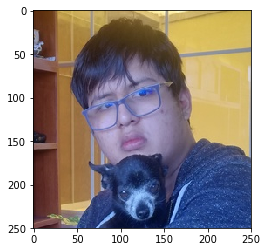

In [24]:
i = "Ricardo_Lazo_fd"
j = 7
im = Image.open(data_folder + "lfw/" + face_folder + i + "/" + i + "_" + str_converter(j, 4) + ".jpg")
temp_np = np.reshape(np.array(im), (1,3,250,250))
x = Variable(torch.from_numpy(temp_np)).to(torch.float32) 
# Forward pass: compute predicted y by passing x to the model.
y_pred = myCNN(x) #4*1
print(y_pred)
imshow(np.asarray(im))